**MLP Model**

In [31]:
! ls '/Users/ivanarasch/School/Data Mining/CIFAR10_HW.ipynb'

ls: cannot access '/Users/ivanarasch/School/Data Mining/CIFAR10_HW.ipynb': No such file or directory


In [32]:
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [33]:
num_classes=10

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [35]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


In [36]:
print("min pixel value:", np.min(x_train))
print("max pixel value:", np.max(x_train))
print("value data type:", x_train.dtype)

min pixel value: 0
max pixel value: 255
value data type: uint8


In [37]:
x_train_scaled = x_train.astype("float32") / 255
x_test_scaled = x_test.astype("float32") / 255
print(x_train_scaled.shape)
print("min pixel value:", np.min(x_train_scaled))
print("max pixel value:", np.max(x_train_scaled))
print("value data type:", x_train_scaled.dtype)

(50000, 32, 32, 3)
min pixel value: 0.0
max pixel value: 1.0
value data type: float32


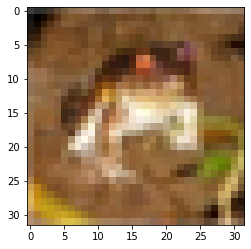

In [38]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")
plt.show()

In [39]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [40]:
y_train[0]

array([6], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


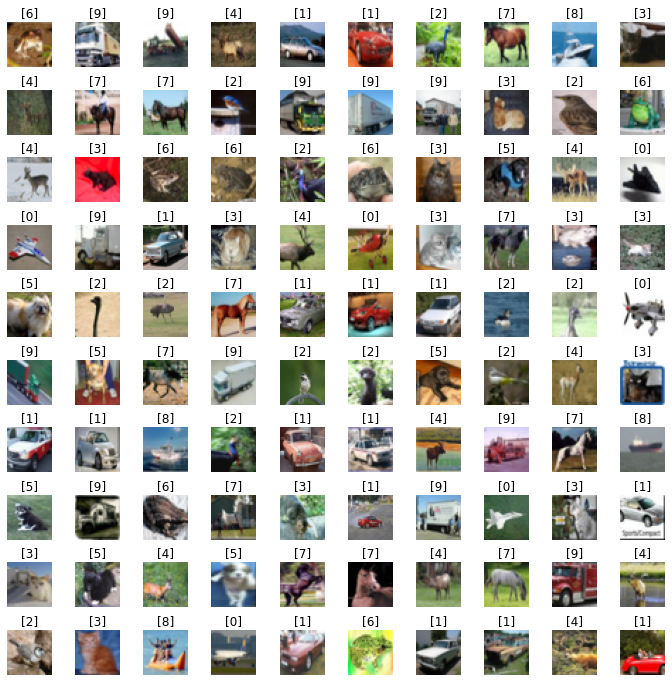

In [41]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_scaled[index], cmap="gray")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [42]:
print('Before encoding (labels):')
print(y_train[0])
print(y_train.shape)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded  = keras.utils.to_categorical(y_test, num_classes)

print('After encoding:')
print(y_train_encoded[0])
print(y_train_encoded .shape)

Before encoding (labels):
[6]
(50000, 1)
After encoding:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(50000, 10)


In [43]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               307300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="categorical_crossentropy",
              optimizer='SGD',
              metrics=["accuracy"])

In [46]:
history  = model.fit(x_train_scaled, y_train_encoded,batch_size=256, epochs=15, validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 5ms/step - loss: 2.0819 - accuracy: 0.2485 - val_loss: 1.9697 - val_accuracy: 0.3018
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 1.9189 - accuracy: 0.3230 - val_loss: 1.9109 - val_accuracy: 0.3294
Epoch 3/15
176/176 [==============================] - 1s 4ms/step - loss: 1.8619 - accuracy: 0.3496 - val_loss: 1.8616 - val_accuracy: 0.3552
Epoch 4/15
176/176 [==============================] - 1s 4ms/step - loss: 1.8263 - accuracy: 0.3654 - val_loss: 1.8444 - val_accuracy: 0.3576
Epoch 5/15
176/176 [==============================] - 1s 4ms/step - loss: 1.8002 - accuracy: 0.3758 - val_loss: 1.8125 - val_accuracy: 0.3636
Epoch 6/15
176/176 [==============================] - 1s 4ms/step - loss: 1.7775 - accuracy: 0.3839 - val_loss: 1.7891 - val_accuracy: 0.3762
Epoch 7/15
176/176 [==============================] - 1s 4ms/step - loss: 1.7586 - accuracy: 0.3892 - val_loss: 1.7847 - val_accuracy: 0.3754
Epoch 

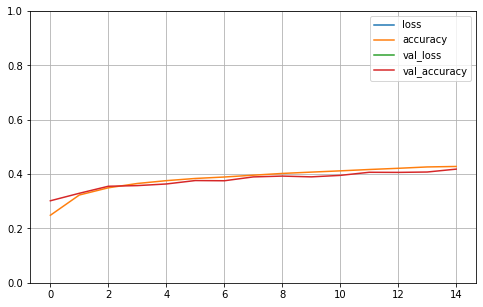

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
score = model.evaluate(x_test_scaled, y_test_encoded)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
trainscore = model.evaluate(x_train_scaled, y_train_encoded)
print("Train loss:", trainscore[0])
print("Train accuracy:", trainscore[1])
score = model.evaluate(x_test, y_test_encoded, batch_size=128, verbose=0)


313/313 [==============================] - 1s 3ms/step - loss: 1.6500 - accuracy: 0.4263
Test loss: 1.649966835975647
Test accuracy: 0.4262999892234802
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6403 - accuracy: 0.4321
Train loss: 1.640305519104004
Train accuracy: 0.4321399927139282
Validation loss, Validation Accuracy [1.649966835975647, 0.4262999892234802]


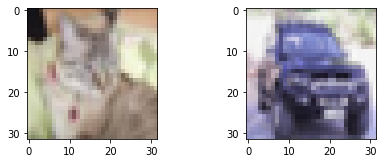

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test_scaled[8:10]):
    plt.subplot(1, 2, index + 1)
    plt.imshow(image, cmap="gray")
    # plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [50]:
print('true labels', y_test[8:10])
print('encoded labels \n', y_test_encoded[8:10])

true labels [[3]
 [1]]
encoded labels 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
y_proba = model.predict(x_test_scaled[8:10])
y_proba.round(2)

1/1 [==============================] - 0s 41ms/step


array([[0.08, 0.05, 0.21, 0.18, 0.12, 0.19, 0.07, 0.05, 0.04, 0.01],
       [0.03, 0.68, 0.02, 0.02, 0.  , 0.01, 0.  , 0.  , 0.13, 0.11]],
      dtype=float32)

Epoch 1/30
176/176 [==============================] - 2s 7ms/step - loss: 1.9886 - accuracy: 0.2705 - val_loss: 1.8536 - val_accuracy: 0.3306
Epoch 2/30
176/176 [==============================] - 1s 7ms/step - loss: 1.7292 - accuracy: 0.3756 - val_loss: 1.7143 - val_accuracy: 0.3882
Epoch 3/30
176/176 [==============================] - 1s 6ms/step - loss: 1.6434 - accuracy: 0.4082 - val_loss: 1.6651 - val_accuracy: 0.4050
Epoch 4/30
176/176 [==============================] - 1s 7ms/step - loss: 1.5627 - accuracy: 0.4397 - val_loss: 1.5789 - val_accuracy: 0.4326
Epoch 5/30
176/176 [==============================] - 1s 7ms/step - loss: 1.5135 - accuracy: 0.4585 - val_loss: 1.5131 - val_accuracy: 0.4632
Epoch 6/30
176/176 [==============================] - 1s 6ms/step - loss: 1.4833 - accuracy: 0.4673 - val_loss: 1.5001 - val_accuracy: 0.4606
Epoch 7/30
176/176 [==============================] - 1s 5ms/step - loss: 1.4560 - accuracy: 0.4778 - val_loss: 1.4595 - val_accuracy: 0.4854
Epoch 

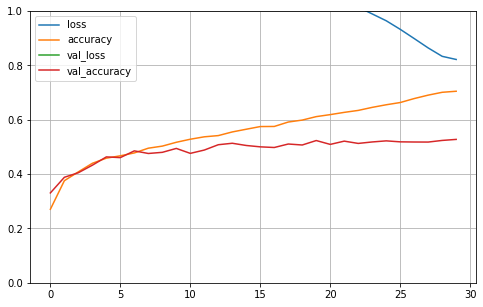

In [68]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
model.add(keras.layers.Dense(600, activation="relu"))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

history  = model.fit(x_train_scaled, y_train_encoded, batch_size=256, epochs=30, validation_split=0.1)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
score = model.evaluate(x_test_scaled, y_test_encoded)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
trainscore = model.evaluate(x_train_scaled, y_train_encoded)
print("Train loss:", trainscore[0])
print("Train accuracy:", trainscore[1])
print("Validation loss, Validation Accuracy", score)
score = model.evaluate(x_test, y_test_encoded, batch_size=128, verbose=0)



313/313 [==============================] - 1s 3ms/step - loss: 1.5669 - accuracy: 0.5148
Test loss: 1.5668812990188599
Test accuracy: 0.5148000121116638
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8320 - accuracy: 0.7119
Train loss: 0.8320425748825073
Train accuracy: 0.7119200229644775
Validation loss, Validation Accuracy [1.5668812990188599, 0.5148000121116638]


**CNN Model**

In [54]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
print(keras.__version__)

2.9.0


In [55]:
# Check for NaN Values
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

False
False


In [56]:
print('Before encoding (labels):')
print(y_train[0])
print(y_train.shape)
y_train_encoded = keras.utils.to_categorical(y_train, num_classes)
y_test_encoded  = keras.utils.to_categorical(y_test, num_classes)

print('After encoding:')
print(y_train_encoded[0])
print(y_train_encoded .shape)

Before encoding (labels):
[6]
(50000, 1)
After encoding:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(50000, 10)


In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 
                           (5,5), 
                           strides=(1,1), 
                           padding='same', 
                           data_format = 'channels_last',
                           dilation_rate=(1, 1),
                           activation='relu', 
                           input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [59]:
history  = model.fit(x_train_scaled, y_train_encoded, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 10s 6ms/step - loss: 1.5378 - accuracy: 0.4452 - val_loss: 1.3216 - val_accuracy: 0.5198
Epoch 2/5
704/704 [==============================] - 4s 5ms/step - loss: 1.1874 - accuracy: 0.5779 - val_loss: 1.1713 - val_accuracy: 0.5832
Epoch 3/5
704/704 [==============================] - 4s 5ms/step - loss: 1.0276 - accuracy: 0.6376 - val_loss: 0.9850 - val_accuracy: 0.6576
Epoch 4/5
704/704 [==============================] - 3s 5ms/step - loss: 0.9147 - accuracy: 0.6785 - val_loss: 0.9643 - val_accuracy: 0.6642
Epoch 5/5
704/704 [==============================] - 3s 5ms/step - loss: 0.8444 - accuracy: 0.7030 - val_loss: 0.9003 - val_accuracy: 0.6858


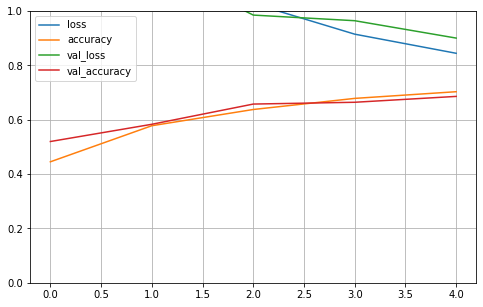

In [60]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
testscore = model.evaluate(x_test_scaled, y_test_encoded)
print("Test loss:", testscore[0])
print("Test accuracy:", testscore[1])
trainscore = model.evaluate(x_train_scaled, y_train_encoded)
print("Train loss:", trainscore[0])
print("Train accuracy:", trainscore[1])
print("Validation loss, Validation Accuracy", score)
score = model.evaluate(x_test, y_test_encoded, batch_size=128, verbose=0)

313/313 [==============================] - 1s 3ms/step - loss: 0.9409 - accuracy: 0.6696
Test loss: 0.9408608675003052
Test accuracy: 0.6696000099182129
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7663 - accuracy: 0.7359
Train loss: 0.7663143873214722
Train accuracy: 0.7358800172805786
Validation loss, Validation Accuracy [261.0447082519531, 0.44690001010894775]


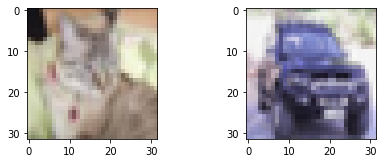

In [62]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(x_test_scaled[8:10]):
    plt.subplot(1, 2, index + 1)
    plt.imshow(image, cmap="gray")
    # plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [63]:
print('true labels', y_test[8:10])
print('encoded labels \n', y_test_encoded[8:10])

true labels [[3]
 [1]]
encoded labels 
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
y_proba = model.predict(x_test_scaled[8:10])
y_proba.round(2)

1/1 [==============================] - 0s 101ms/step


array([[0.  , 0.  , 0.07, 0.54, 0.28, 0.08, 0.02, 0.01, 0.  , 0.  ],
       [0.  , 0.97, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03]],
      dtype=float32)

**Comparing MLP and CNN models**

MLP:
Testing Accuracy: 51.48% Training Accuracy: 71.19% Validation Accuracy: 52.43% 

The MLP Model is overfitting because the training is greater then the test. 

CNN:
Testing Accuracy: 66.96% Training Accuracy: 73.58% Validation Accuracy: 44.69%
 The CNN model also is overfitted because the validation accuracy is much lower.

 Bewtween the two models the CNN seems to be the best because both testing and training accuracy score are higher.
 


